In [93]:
#Antonio Muniz  22.119.001 - 0

In [94]:
#Passo 1 - Definir Database

In [95]:
from scipy.stats import shapiro
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn import datasets

df = pd.read_csv('data/concrete_data.csv')

In [96]:
#Passo 2 - Limpar Database

In [97]:
#exibir valores ausentes ou null
df.isnull().sum().sort_values(ascending=False)[:10]
print("Número de linhas e colunas no conjunto de treinamento:", df.shape)
attributes = list(df.columns)
#removendo valores nulos
df.dropna()

#preencher os nulos
df.fillna(df.mean(0))

#remover duplicados
df.drop_duplicates()

Número de linhas e colunas no conjunto de treinamento: (1030, 9)


,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [98]:
#Passo 3 - Definir x e y

In [99]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

print(x)
print(y)

[[ 540.     0.     0.  ... 1040.   676.    28. ]
 [ 540.     0.     0.  ... 1055.   676.    28. ]
 [ 332.5  142.5    0.  ...  932.   594.   270. ]
 ...
 [ 148.5  139.4  108.6 ...  892.4  780.    28. ]
 [ 159.1  186.7    0.  ...  989.6  788.9   28. ]
 [ 260.9  100.5   78.3 ...  864.5  761.5   28. ]]
[79.99 61.89 40.27 ... 23.7  32.77 32.4 ]


In [100]:
#Passo 4 - Média

In [101]:
averageX = np.mean(x) 
averageY = np.mean(y) 

print("Média de x: " + str(averageX)) #calcula a média de x
print("Média de y: " + str(averageY))  #calcula a média de y

Média de x: 298.6481917475728
Média de y: 35.817961165048544


In [102]:
#Passo 5 - Variância

In [103]:
varianceX = np.var(x) 
varianceY = np.var(y) 

print("Variância de x: " + str(varianceX))
print("Variância de y: " + str(varianceY)) 

Variância de x: 124174.2081423613
Variância de y: 278.81086128004523


In [104]:
#Passo 6 - Desvio Padrão

In [105]:
deviationX = np.std(x)
deviationY = np.std(y)

print("Desvio Padrão de x: " + str(deviationX)) #calcula o desvio padrão de x
print("Desvio Padrão de y: " + str(deviationY)) #calcula o desvio padrão de y  

Desvio Padrão de x: 352.3836093554314
Desvio Padrão de y: 16.697630409134263


In [106]:
#Passo 7 - Mediana

In [107]:
medianX = np.median(x)
medianY = np.median(y)

print("Mediana de x: " + str(medianX)) #calcula o desvio padrão de x
print("Mediana de y: " + str(medianY)) #calcula o desvio padrão de y    

Mediana de x: 162.0
Mediana de y: 34.445


In [108]:
#Passo 8 - Histograma

In [109]:
# Histograma de x

[[ 540.     0.     0.  ... 1040.   676.    28. ]
 [ 540.     0.     0.  ... 1055.   676.    28. ]
 [ 332.5  142.5    0.  ...  932.   594.   270. ]
 ...
 [ 148.5  139.4  108.6 ...  892.4  780.    28. ]
 [ 159.1  186.7    0.  ...  989.6  788.9   28. ]
 [ 260.9  100.5   78.3 ...  864.5  761.5   28. ]]


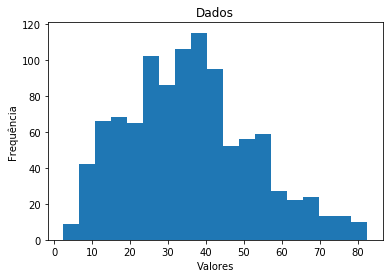

In [110]:
h = np.histogram(x, bins = 'auto') #calcula o histograma
print(x)
plt.hist(y, bins = 'auto')
plt.title('Dados')
plt.ylabel('Frequência')
plt.xlabel('Valores')
plt.show()

In [111]:
# Histograma de y

(array([  9,  42,  66,  68,  65, 102,  86, 106, 115,  95,  52,  56,  59,
        27,  22,  24,  13,  13,  10]), array([ 2.33      ,  6.55473684, 10.77947368, 15.00421053, 19.22894737,
       23.45368421, 27.67842105, 31.90315789, 36.12789474, 40.35263158,
       44.57736842, 48.80210526, 53.02684211, 57.25157895, 61.47631579,
       65.70105263, 69.92578947, 74.15052632, 78.37526316, 82.6       ]))


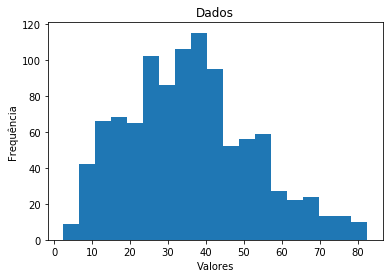

In [112]:
h = np.histogram(y, bins = 'auto') #calcula o histograma
print(h)
plt.hist(y, bins = 'auto')
plt.title('Dados')
plt.ylabel('Frequência')
plt.xlabel('Valores')
plt.show()

In [113]:
#Passo 9 - Coeficiente de Correlação

In [91]:
#Passo 10 - Teste de Normalidade